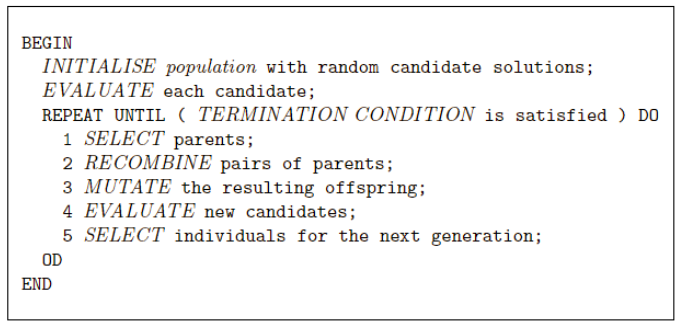

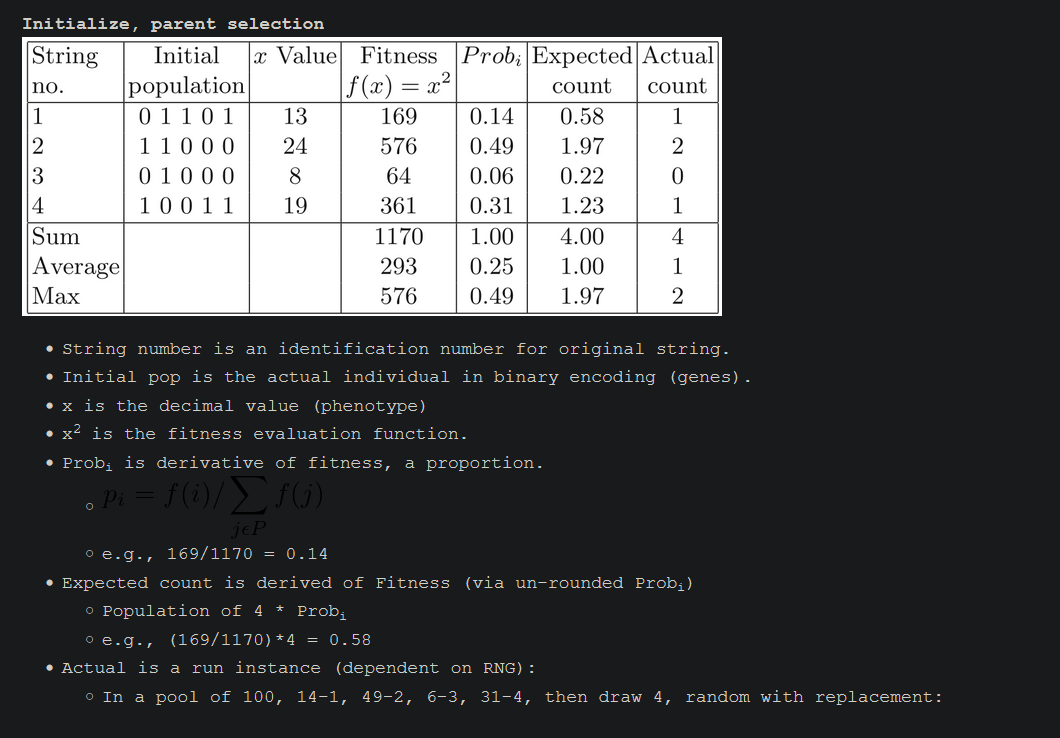

In [312]:
import random

# Define parameters
population_size = 20  # Number of individuals in the population
mutation_rate = 0.1  # Probability of mutation (not being used)
num_generations = 500  # Number of generations
bit_length = 5  # Number of bits in each binary string
selecting_percentage = 0.5 # selects percetage of top fitness performers

# Initialize the population with random 5-bit binary strings
population = [''.join(random.choice('01') for _ in range(bit_length)) for _ in range(population_size)]
# population = ['01101','11000','01000','10011']

population

['11000',
 '11010',
 '11101',
 '01110',
 '10010',
 '01100',
 '10001',
 '11110',
 '10000',
 '11000',
 '11100',
 '11110',
 '11111',
 '01001',
 '11010',
 '01111',
 '10101',
 '00100',
 '11110',
 '11010']

In [234]:
# Define the fitness function
def fitness(binary_str):
    return (int(binary_str, 2) ** 2)

In [314]:
# Main evolutionary loop
for generation in range(num_generations):
    #print(f"generation: {generation}")
    #print(f"population: {population}")
    
    # Evaluate the fitness of each individual in the population
    fitness_scores = [fitness(individual) for individual in population]
    
    #print(f"fitness_scores: {fitness_scores}")
    
    # Select the top-performing individuals based on fitness
    # Here, we use a simple truncation selection method
    num_selected = int(selecting_percentage * population_size)
    selected_indices = sorted(range(len(fitness_scores)), key=lambda i: fitness_scores[i], reverse=True)[:num_selected]
    selected_population = [population[i] for i in selected_indices]
    
    #print(f"selected_population: {selected_population}")
    
    # Create the next generation by mutation
    new_population = []
    while len(new_population) < population_size:
        parent = random.choice(selected_population)
        # Apply mutation by flipping a random bit (Single point mutation)
        # we could also make mutations more dynamic such that it decreases as
        # we get larger fitness
        mutation_point = random.randint(0, bit_length - 1)
        mutated_bit = '0' if parent[mutation_point] == '1' else '1'
        child = parent[:mutation_point] + mutated_bit + parent[mutation_point + 1:]
        new_population.append(child)

    # Replace the old population with the new generation
    population = new_population

In [316]:
# Find the best individual in the final population
print(f"pop: {population}")
best_individual = max(population, key=fitness)
best_fitness = fitness(best_individual)

print(f"Best Individual: {best_individual}")
print(f"Best Fitness: {best_fitness}")

pop: ['10110', '11100', '11111', '10110', '11010', '11100', '01011', '10101', '10101', '10011', '11010', '01110', '11111', '11100', '11100', '10011', '11100', '11111', '10101', '10011']
Best Individual: 11111
Best Fitness: 961


---------------

In [104]:
fitness_scores = [324, 23, 12, 2, 2345, 876]


In [120]:
sorted(range(len(fitness_scores)), key=lambda i: fitness_scores[i], reverse=True)[:num_selected]

[4, 5, 0, 1, 2, 3]

In [ ]:
selected_indices = sorted(range(len(fitness_scores)), key=lambda i: fitness_scores[i], reverse=True)[:num_selected]